In [1]:
import h2o

In [2]:
h2o.init(nthreads=-1, max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21); OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from /home/tigran/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpriyqp83i
  JVM stdout: /tmp/tmpriyqp83i/h2o_tigran_started_from_python.out
  JVM stderr: /tmp/tmpriyqp83i/h2o_tigran_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Yerevan
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_tigran_utb2d6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('/home/tigran/Downloads/code/Data/StateFarm_for_H2O.csv', sep=';')
data.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,65999,237,1,14,0,6,0
1,0,65,19,56,0,3,0
2,54500,63,28,17,0,6,0
3,37260,62,19,42,0,8,0
4,68987,71,11,40,0,6,0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Response', axis=1),
                                                   data['Response'],
                                                   test_size=0.3,
                                                   stratify=data['Response'],
                                                   random_state=42)

In [5]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

tr = h2o.H2OFrame(train)
tst = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
data = h2o.upload_file(path='/home/tigran/Downloads/code/Data/StateFarm_for_H2O.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
tr, tst = data.split_frame(ratios=[.7], seed=42)
tr.describe()

Rows:5799
Cols:7

,﻿Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
type,int,int,int,int,int,int,int
mins,0.0,61.0,0.0,0.0,0.0,1.0,0.0
mean,37865.85031902055,93.31401965856195,15.117261596827044,48.28694602517683,0.3821348508363507,2.990170719089499,0.09949991377823762
maxs,99961.0,298.0,35.0,99.0,5.0,9.0,1.0
sigma,30409.096303369428,34.75395002180724,10.092161225345725,27.74697967899083,0.9094184627653707,2.4063142665913926,0.29935787025903
zeros,1468,0,206,58,4605,0,5222
missing,0,0,0,0,0,0,0
0,65999.0,237.0,1.0,14.0,0.0,6.0,0.0
1,0.0,65.0,19.0,56.0,0.0,3.0,0.0
2,54500.0,63.0,28.0,17.0,0.0,6.0,0.0


In [8]:
data['tariff_id'] = data['tariff_id'].asnumeric()

In [9]:
tr['Response'] = tr['Response'].asfactor()
tst['Response'] = tst['Response'].asfactor()

In [10]:
tr.describe()

Rows:5799
Cols:7

,﻿Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
type,int,int,int,int,int,int,enum
mins,0.0,61.0,0.0,0.0,0.0,1.0,
mean,37865.85031902055,93.31401965856195,15.117261596827044,48.28694602517683,0.3821348508363507,2.990170719089499,
maxs,99961.0,298.0,35.0,99.0,5.0,9.0,
sigma,30409.096303369428,34.75395002180724,10.092161225345725,27.74697967899083,0.9094184627653707,2.4063142665913926,
zeros,1468,0,206,58,4605,0,
missing,0,0,0,0,0,0,0
0,65999.0,237.0,1.0,14.0,0.0,6.0,0
1,0.0,65.0,19.0,56.0,0.0,3.0,0
2,54500.0,63.0,28.0,17.0,0.0,6.0,0


In [11]:
dependent = 'Response'
predictors = list(tr.columns)
predictors.remove(dependent)

In [12]:
predictors

['\ufeffIncome',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies']

In [13]:
from h2o.estimators import H2ORandomForestEstimator

In [14]:
forest_model = H2ORandomForestEstimator(seed=42)
forest_model.train(x=predictors, y=dependent, training_frame=tr, validation_frame=tst);

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [15]:
forest_model


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1684054126087_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          294710                 17           20           19.92         414           506           463.58

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04619564763372571
RMSE: 0.21493172784334497
LogLoss: 0.3693878012757886
Mean Per-Class Error: 0.08679798904382008
AUC: 0.9457811472194362
AUCPR: 0.6697982301465149
Gini: 0.8915622944388724

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3176226465604006
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      4949  273  0.0523   (273.0/5222.0)
1      70    507  0.1213   (70.0/577.0)
Total  5019  780  0.0591   (343.0/5799.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.317623     0.747237  210
max f2                       0.257955     0.830183  232
max f0point5                 0.363177     0.695677  196
max accuracy                 0.363177     0.942404  196
max precision                0.827996     0.75      51
max recall                   0            1         399
max specificity              1            0.99617   0
max absolute_mcc             0.312368     0.725017  211
max min_per_class_accuracy   0.227179     0.924358  245
max mean_per_class_accuracy  0.192454     0.926699  261
max tns                      1            5202      0
max fns                      1            529       0
max fps                      0            5222      399
max tps                      0            577       399
max tnr                      1            0.99617   0
max fnr                      1            0.916811  0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate:  9.95 %, avg score: 13.38 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0117262                   1                  7.0943     7.0943             0.705882         1            0.705882                    1                   0.0831889       0.0831889                  609.43    609.43             0.079359
2        0.0200034                   0.943232           6.49079    6.84457            0.645833         0.96029      0.681034                    0.983568            0.0537262       0.136915                   549.079   584.457            0.12983
3        0.0300052                   0.900107           8.14418    7.27777            0.810345         0.924378     0.724138                    0.963838            0.0814558       0.218371                   714.418   627.777            0.209179
4        0.0400069                   0.825845           8.31746    7.53769            0.827586         0.867226     0.75                        0.939685            0.0831889       0.30156                    731.746   653.769            0.290453
5        0.0500086                   0.777251           6.58465    7.34709            0.655172         0.801316     0.731034                

In [16]:
predictions = forest_model.predict(tst)
predictions

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.542,0.458
0,0.928095,0.0719048
0,0.875667,0.124333
0,0.933,0.067
0,0.888,0.112
0,1,0
0,0.931667,0.0683333
0,0.96,0.04
0,0.808,0.192
0,1,0


<AxesSubplot:xlabel='false positive rate', ylabel='true positive rate'>

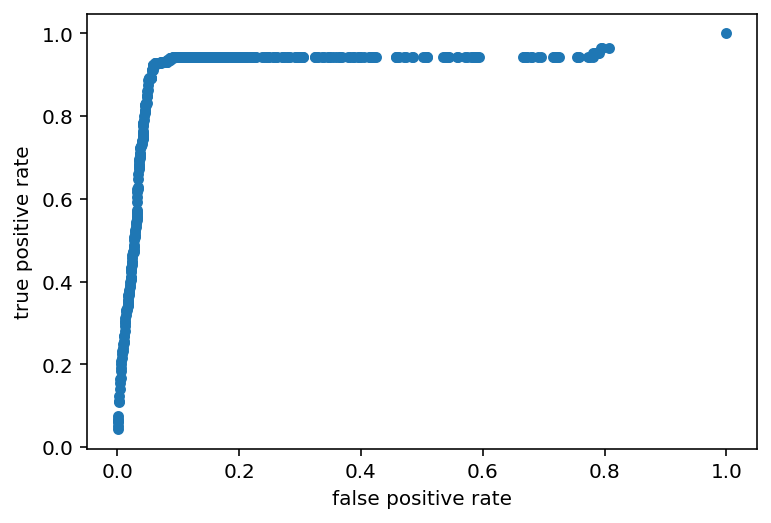

In [17]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

tmp = forest_model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0],
                  'true positive rate': tmp[1]})

df.plot(kind='scatter', x = 'false positive rate', y='true positive rate')

In [18]:
forest_model.auc(valid=True)

0.9276565747853592

In [19]:
from h2o.grid.grid_search import H2OGridSearch

hyper_parameters = {'max_depth': [15, 20, 25]}
gridsearch = H2OGridSearch(H2ORandomForestEstimator, grid_id='mygrid',
                          hyper_params=hyper_parameters)
gridsearch.train(predictors, dependent, ntrees=100, training_frame=tr, nfolds=5, keep_cross_validation_predictions=True, seed=100);

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [20]:
gridsearch

,max_depth,model_ids,logloss
,15.0,mygrid_model_1,0.2055497
,20.0,mygrid_model_2,0.3151753
,25.0,mygrid_model_3,0.3690301


In [21]:
gridperf = gridsearch.get_grid(sort_by='auc', decreasing=True)

In [22]:
gridperf

,max_depth,model_ids,auc
,15.0,mygrid_model_1,0.8918557
,20.0,mygrid_model_2,0.8855691
,25.0,mygrid_model_3,0.8846057


In [23]:
best_model = gridperf.models[0]
bestmodel_perf = best_model.model_performance(tst)
print(bestmodel_perf.auc())

0.9287609579755988


In [24]:
h2o.cluster().shutdown()

H2O session _sid_b1d2 closed.
